Get the actual solar elongation from JPL Horizons

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from astropy.time import Time

from astroquery.jplhorizons import Horizons

In [13]:
mjd_jd = 2400000.5 # conversion from MJD to JD

In [30]:
obj_id = 2212
loc = "T05"

In [31]:
t1=Time(57938,format="mjd")
t2=Time(59379,format="mjd")

In [32]:
epoch_list = {'start':t1.iso, 'stop':t2.iso, 'step':'1d'} # a range of epochs in Horizons format is FAST!

In [33]:
obj = Horizons(id=obj_id, location=loc, epochs=epoch_list)

In [34]:
eph = obj.ephemerides()

In [35]:
eph

targetname,datetime_str,datetime_jd,H,G,solar_presence,flags,RA,DEC,RA_app,DEC_app,RA_rate,DEC_rate,AZ,EL,AZ_rate,EL_rate,sat_X,sat_Y,sat_PANG,siderealtime,airmass,magextinct,V,surfbright,illumination,illum_defect,sat_sep,sat_vis,ang_width,PDObsLon,PDObsLat,PDSunLon,PDSunLat,SubSol_ang,SubSol_dist,NPole_ang,NPole_dist,EclLon,EclLat,r,r_rate,delta,delta_rate,lighttime,vel_sun,vel_obs,elong,elongFlag,alpha,lunar_elong,lunar_illum,sat_alpha,sunTargetPA,velocityPA,OrbPlaneAng,constellation,TDB-UT,ObsEclLon,ObsEclLat,NPole_RA,NPole_DEC,GlxLon,GlxLat,solartime,earth_lighttime,RA_3sigma,DEC_3sigma,SMAA_3sigma,SMIA_3sigma,Theta_3sigma,Area_3sigma,RSS_3sigma,r_3sigma,r_rate_3sigma,SBand_3sigma,XBand_3sigma,DoppDelay_3sigma,true_anom,hour_angle,alpha_true,PABLon,PABLat
---,---,d,mag,---,---,---,deg,deg,deg,deg,arcsec / h,arcsec / h,deg,deg,arcsec / min,arcsec / min,arcsec,arcsec,deg,---,---,mag,mag,mag / arcsec2,%,arcsec,arcsec,---,arcsec,deg,deg,deg,deg,deg,arcsec,deg,arcsec,deg,deg,AU,km / s,AU,km / s,min,km / s,km / s,deg,---,deg,deg,%,deg,deg,deg,deg,---,s,deg,deg,deg,deg,deg,deg,---,min,arcsec,arcsec,arcsec,arcsec,deg,arcsec2,arcsec,km,km / s,Hz,Hz,s,deg,---,deg,deg,deg
str25,str17,float64,float64,float64,str1,str1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str1,float64,int64,int64,int64,int64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str2,float64,float64,float64,float64,float64,float64,float64,str3,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
2212 Hephaistos (1978 SB),2017-Jul-04 00:00,2457938.5,13.33,0.15,*,,49.19853,19.93157,49.44387,19.99165,30.28557,11.07219,284.845253,19.036253,231.15,-815.45,-178593.8,-10371.99,277.471,8.3959415504,3.035,0.397,19.394,5.79,98.3768,3.5e-05,179744.4,*,0.002163,--,--,--,--,76.44,0.0,--,--,37.4369,2.009,3.07864538279,10.2594772,3.63313918133575,-10.1537907,30.2158972,12.8671187,25.6944341,49.929,/L,14.6357,171.1,78.0907,115.4367,256.362,237.087,3.083,Ari,69.184007,52.3176139,1.7034647,--,--,163.58371,-31.236032,13.5101466847,0.000355,0.016,0.015,0.018,0.012,38.824,0.0013792,0.022,46.385,2.2e-06,0.04,0.14,0.000309,160.7268,5.099683322,14.6393,44.758,1.8704
2212 Hephaistos (1978 SB),2017-Jul-05 00:00,2457939.5,13.33,0.15,*,,49.41291,20.00658,49.65855,20.0664,29.92162,10.95174,285.13065,18.360103,233.5,-814.37,-181417.14,-9777.26,277.872,8.4616516202,3.14,0.411,19.399,5.798,98.34754,3.6e-05,182404.4,*,0.002167,--,--,--,--,76.49,0.0,--,--,37.5187,2.0254,3.084558609917,10.2168115,3.6269656138904,-10.4304599,30.1645532,12.8241224,25.5125681,50.6679,/L,14.7679,171.1,85.3474,114.5657,256.409,237.103,3.10223,Ari,69.183979,52.531867,1.7236259,--,--,163.714755,-31.052533,13.5072207271,0.000355,0.016,0.015,0.018,0.012,38.797,0.0013809,0.022,46.2891,2.2e-06,0.04,0.14,0.000309,160.8101,5.151081362,14.7714,44.906,1.8891
2212 Hephaistos (1978 SB),2017-Jul-06 00:00,2457940.5,13.33,0.15,*,,49.62475,20.0808,49.87069,20.14037,29.55343,10.83185,285.416902,17.682593,235.91,-813.26,-184256.08,-9161.62,278.272,8.5273621919,3.253,0.426,19.404,5.806,98.31854,3.6e-05,185073.7,*,0.002171,--,--,--,--,76.53,0.0,--,--,37.6001,2.0418,3.090447240966,10.1742871,3.62063247176798,-10.7043594,30.11188207,12.7813255,25.3327371,51.4094,/L,14.8977,161.5,91.3095,113.6944,256.454,237.119,3.12078,Ari,69.183951,52.7434958,1.7439134,--,--,163.84332,-30.870925,13.5043926854,0.000355,0.016,0.015,0.018,0.012,38.771,0.0013826,0.022,46.193,2.2e-06,0.04,0.14,0.000308,160.8931,5.202649379,14.9012,45.0524,1.9079
2212 Hephaistos (1978 SB),2017-Jul-07 00:00,2457941.5,13.33,0.15,*,,49.834,20.15423,50.08025,20.21355,29.18088,10.71252,285.704124,17.003721,238.38,-812.13,-187110.71,-8525.19,278.671,8.593073171,

In [36]:
df_eph = eph.to_pandas()

In [37]:
list(df_eph)

['targetname',
 'datetime_str',
 'datetime_jd',
 'H',
 'G',
 'solar_presence',
 'flags',
 'RA',
 'DEC',
 'RA_app',
 'DEC_app',
 'RA_rate',
 'DEC_rate',
 'AZ',
 'EL',
 'AZ_rate',
 'EL_rate',
 'sat_X',
 'sat_Y',
 'sat_PANG',
 'siderealtime',
 'airmass',
 'magextinct',
 'V',
 'surfbright',
 'illumination',
 'illum_defect',
 'sat_sep',
 'sat_vis',
 'ang_width',
 'PDObsLon',
 'PDObsLat',
 'PDSunLon',
 'PDSunLat',
 'SubSol_ang',
 'SubSol_dist',
 'NPole_ang',
 'NPole_dist',
 'EclLon',
 'EclLat',
 'r',
 'r_rate',
 'delta',
 'delta_rate',
 'lighttime',
 'vel_sun',
 'vel_obs',
 'elong',
 'elongFlag',
 'alpha',
 'lunar_elong',
 'lunar_illum',
 'sat_alpha',
 'sunTargetPA',
 'velocityPA',
 'OrbPlaneAng',
 'constellation',
 'TDB-UT',
 'ObsEclLon',
 'ObsEclLat',
 'NPole_RA',
 'NPole_DEC',
 'GlxLon',
 'GlxLat',
 'solartime',
 'earth_lighttime',
 'RA_3sigma',
 'DEC_3sigma',
 'SMAA_3sigma',
 'SMIA_3sigma',
 'Theta_3sigma',
 'Area_3sigma',
 'RSS_3sigma',
 'r_3sigma',
 'r_rate_3sigma',
 'SBand_3sigma',
 '

In [38]:
df_eph["mjd"] = df_eph["datetime_jd"] - mjd_jd

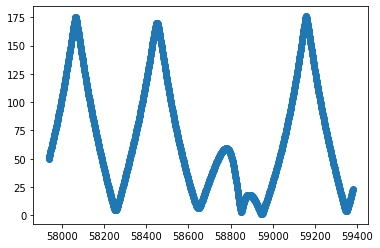

In [39]:
plt.scatter(df_eph["mjd"],df_eph["elong"])